In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 46.1MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
import urllib
url, filename = ("https://www.petfinder.com/sites/default/files/images/content/great-pyrenees-detail-scaled.jpg", "dog1.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
print(output[0])
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 9.3179e-01,  2.4208e-01, -2.7371e-01, -1.6165e+00, -1.0184e-01,
        -9.3605e-01, -8.5704e-01, -1.2807e+00, -4.6964e-01, -3.1018e+00,
        -1.1624e-01, -1.0032e+00, -8.7579e-01, -3.2900e-01,  1.0282e+00,
        -9.0609e-01, -1.8886e+00, -9.8756e-01, -1.0024e+00, -6.6385e-01,
         1.6835e-01, -5.8074e-01, -3.7301e-01, -4.4270e-01,  7.2825e-02,
         5.8063e-01, -2.9621e-01,  3.2107e-01,  9.1388e-01, -1.2181e+00,
        -1.2889e-01,  2.7642e-01, -1.8917e-01, -9.4480e-01,  6.4499e-01,
        -1.0531e-01, -8.6741e-01,  4.4726e-01, -7.6402e-01, -8.0470e-01,
        -7.9535e-02,  2.2423e-01, -6.8041e-01, -1.1854e+00,  1.0589e+00,
         2.6840e-01,  3.5809e-01,  1.3417e+00, -1.3915e+00, -1.8624e-01,
        -2.9538e-01, -1.4090e+00, -2.1932e-01, -8.4394e-02, -4.5624e-01,
         2.3383e-01, -3.2914e-01,  1.1798e+00,  1.3931e+00,  3.4197e-01,
         5.4308e-01, -8.7205e-01,  3.0142e-01, -8.4427e-01,  2.7831e-01,
         2.2780e-01, -9.3222e-01,  1.1651e-01, -9.6

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-03-01 09:54:47--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.2’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2024-03-01 09:54:47 (10.2 MB/s) - ‘imagenet_classes.txt.2’ saved [10472/10472]



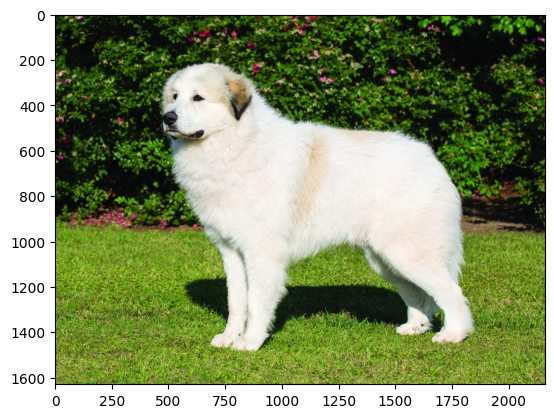

In [ ]:
plt.imshow(input_image)

In [ ]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

kuvasz 0.4887969493865967
Great Pyrenees 0.41063711047172546
Tibetan mastiff 0.009654349647462368
golden retriever 0.008967381902039051
Samoyed 0.00833194050937891
